In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
import domain as dom
import myplot as myplot
from myplot import *
from climbasis import *

In [2]:
source='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'

In [3]:
#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/'
sourceData1=sourceData+'noaaV2c/'
sourceData2=sourceData+'cru/'
sourceData3=sourceData+'era5/'

In [4]:
variable='tas'
units='K'
domain='HMA'
season='JASO'
iyr=1982
fyr=2014

In [5]:
model1=str('noaaV2')
fileName1 = 'air.mon.mean.noaaV2c_185101-201412_2.0x2.0.nc'
ds1 = xr.open_dataset(sourceData1+fileName1)['air']
ds1=ds1[:,0,:,:]#1000 hPa
unit1=ds1.units
field1=dom.field_dom(ds1,domain)

HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Domain;latS,latN,lonW,lonE: HMA 20 45 60 110


In [5]:
model2=str('cru')
fileName2 ='cru_ts4_mon_1901.2020.tmp.dat.nc'
ds2 = xr.open_dataset(sourceData2+fileName2)['tmp']
ylat2=ds2.coords['lat']
xlon2=ds2.coords['lon']
#field2=dom.field_dom(ds2,domain)
#print(ds2.units)

In [6]:
ds2

<xarray.DataArray 'tmp' (time: 1440, lat: 360, lon: 720)>
[373248000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [7]:
#!ls /home/maria/Documents/Data/ERA5/
#!ncdump -h /home/maria/Documents/Data/ERA5/t2m_era5_NH_mon_1979-2020.nc

In [8]:
model3='era5'
fileName3 = 't2m_era5_NH_mon_1979-2020.nc'
ds3 = xr.open_dataset(sourceData3+fileName3)['t2m']
ylat3=ds3.coords['latitude']
xlon3=ds3.coords['longitude']
field3=dom.field_dom(ds3,domain)

HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Domain;latS,latN,lonW,lonE: HMA 20 45 60 110


In [9]:
dsList=[field1,field2,field3]
modelList=[model1,model2,model3]

In [10]:
valsList=[]
anomsList=[]

for elem in dsList:
    if season[0]=='D':
        print('Winter',iyr,'-',iyr+1,fyr-1,'-',fyr)
        vals,anoms=climb.seasonal_selection(elem,season,6,iyr,6,fyr)
    else:
        vals,anoms=climb.seasonal_selection(elem,season,1,iyr,12,fyr)
    valsList.append(vals)
    anomsList.append(anoms)

33
33
33


In [11]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

In [12]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
#---------------------------------------------------------
for elem in anomsList:
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])


trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_tas_noaaV2_obs_original_HMA_JASO_1982_2014
HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_tas_cru_obs_original_HMA_JASO_1982_2014
HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_tas_era5_obs_original_HMA_JASO_1982_2014


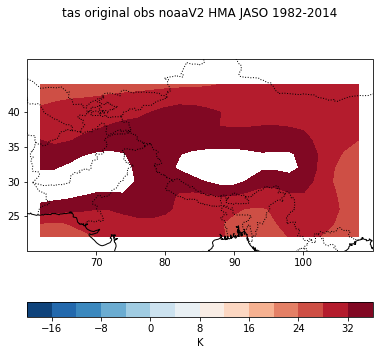

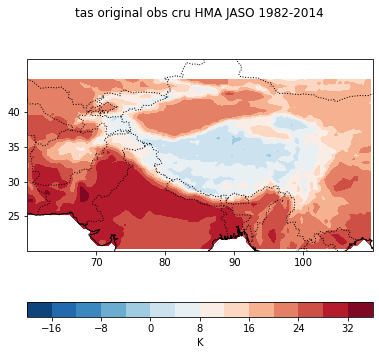

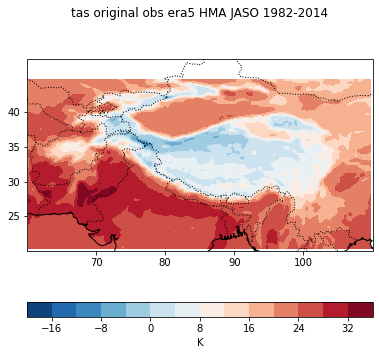

In [13]:
##Clim-----------------
clevs=np.arange(-20,40,4)

color='RdBu_r'
subdomain='HMA'
exp='obs'
decomp='original'
for i in range(len(climList)):
    lat,lon=climb.latlon(climList[i])
    if modelList[i]=='cru':
        dk=0
    else:
        dk=-273.15
    figclim=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=climList[i]+dk, xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figclim.savefig(plotsDir+ofileC+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileC)

In [14]:
##Std---------------
clevs=np.arange(0,2.6,0.1)
color='rainbow'
subdomain='HMA'
exp='obs'
decomp='original'
for i in range(len(stdList)):
    lat,lon=climb.latlon(stdList[i])
    figstd=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=stdList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileS='anoms_std_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
#    figstd.savefig(plotsDir+ofileS+'.png',format='png')
#    print('Figure save at ',plotsDir, 'as',ofileS)

HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_tas_noaaV2_obs_original_HMA_JASO_1982_2014
HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_tas_cru_obs_original_HMA_JASO_1982_2014
HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_tas_era5_obs_original_HMA_JASO_1982_2014


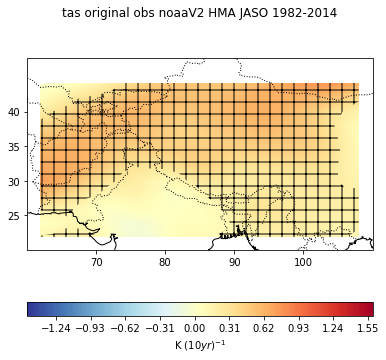

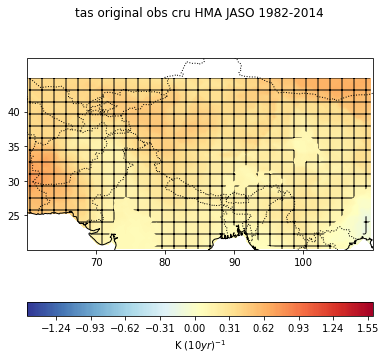

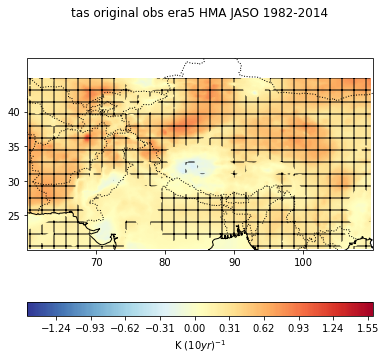

In [15]:
clevs=np.arange(-1.5,1.6,0.01)
#color='RdBu_r'
subdomain='HMA'
exp='obs'
decomp='original'
for i in range(len(parList)):
    lat,lon=climb.latlon(trendList[i])
    figtrend=myplot.oneplot_trend(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, units=units, subdomain=subdomain, par=parList[i], xlon=parList[i][0][lon], ylat=parList[i][0][lat], season=season, iyr=iyr, fyr=fyr)
 #   figtrend=myplot.oneplot_trend(oneplot_trend(variable,decomp,exp,modelList[i],clevs,units,subdomain,parList[i],xlon,ylat,season,iyr,fyr))
    ofileT='spatialtrend_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figtrend.savefig(plotsDir+ofileT+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileT)